In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
stroke_data = pd.read_csv("stroke predict.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_data = stroke_data.fillna(stroke_data["bmi"].mean())
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [5]:
stroke_data = stroke_data.drop("id", axis=1)


In [6]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
stroke_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [8]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
stroke_data["age"] = stroke_data["age"].apply("ceil")
stroke_data["age"] = stroke_data["age"].apply(int)

10.300000000000006 46.29999999999999


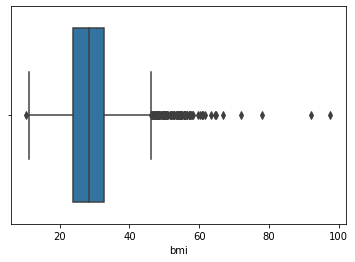

In [10]:
# removing outliers in bmi
sns.boxplot(data=stroke_data,x="bmi")

Q1 = stroke_data["bmi"].quantile(0.25)
Q3 = stroke_data["bmi"].quantile(0.75)
IQR = Q3-Q1

low_bmi = Q1-1.5*IQR
upp_bmi = Q3+1.5*IQR
print(low_bmi,upp_bmi)

stroke_data['bmi'] = pd.to_numeric(stroke_data["bmi"])
stroke_data["bmi"] = stroke_data["bmi"].apply(lambda x:10 if x<10 else x)
stroke_data["bmi"] = stroke_data["bmi"].apply(lambda x:46 if x>46 else x)





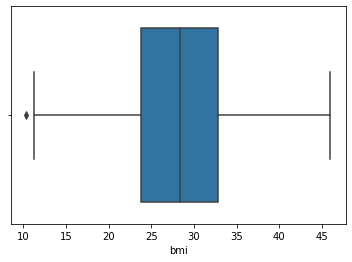

In [11]:
sns.boxplot(data=stroke_data,x="bmi")
plt.show()


-29.0 115.0


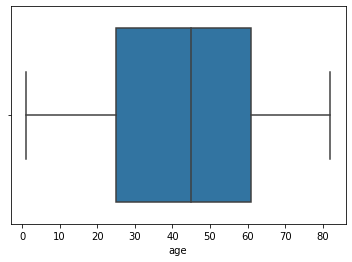

In [12]:
# removing outliers in age
sns.boxplot(data=stroke_data,x="age")
Q1 = stroke_data["age"].quantile(0.25)
Q3 = stroke_data["age"].quantile(0.75)
IQR = Q3-Q1
#print(IQR)
low_age = Q1-1.5*IQR
upp_age = Q3+1.5*IQR
print(low_age,upp_age)

stroke_data['age'] = pd.to_numeric(stroke_data["age"])
stroke_data["age"] = stroke_data["age"].apply(lambda x:0 if x<0 else x)
stroke_data["age"] = stroke_data["age"].apply(lambda x:115 if x>115 else x)







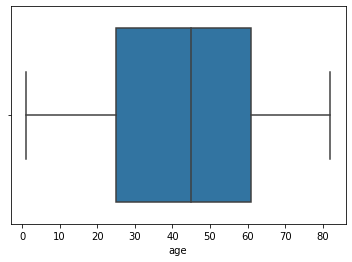

In [13]:
sns.boxplot(data=stroke_data, x="age")
plt.show()


21.977500000000006 169.35750000000002


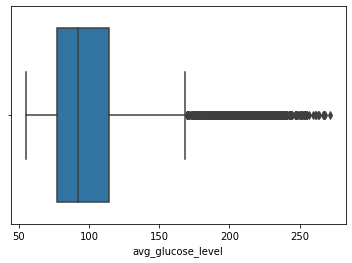

In [14]:
# removing outliers in age
sns.boxplot(data=stroke_data,x="avg_glucose_level")
Q1 = stroke_data["avg_glucose_level"].quantile(0.25)
Q3 = stroke_data["avg_glucose_level"].quantile(0.75)
IQR = Q3-Q1
#print(IQR)
low_glu = Q1-1.5*IQR
upp_glu = Q3+1.5*IQR
print(low_glu,upp_glu)

stroke_data['avg_glucose_level'] = pd.to_numeric(stroke_data["avg_glucose_level"])
stroke_data["avg_glucose_level"] = stroke_data["avg_glucose_level"].apply(lambda x:21 if x<21 else x)
stroke_data["avg_glucose_level"] = stroke_data["avg_glucose_level"].apply(lambda x:169 if x>169 else x)



<AxesSubplot:xlabel='avg_glucose_level'>

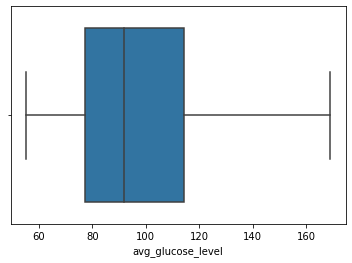

In [15]:
sns.boxplot(data=stroke_data, x="avg_glucose_level")


In [16]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.237769,0.097456,0.054012,100.952339,28.714157,0.048728
std,22.591958,0.296607,0.226063,33.124523,7.101660,0.215320
min,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,169.000000,46.000000,1.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# gender male, female and other (1,0,2)
stroke_data["gender"] =  labelencoder.fit_transform(stroke_data["gender"])

 # work_type has Private = 2' 'Self-employed = 3' ,'Govt_job = 0', 'children = 4' ,'Never_worked =1 '
stroke_data["ever_married"] = labelencoder.fit_transform(stroke_data["ever_married"])

# work_type has Private = 2' 'Self-employed = 3' ,'Govt_job = 0', 'children = 4' ,'Never_worked =1 '
stroke_data["work_type"] = labelencoder.fit_transform(stroke_data["work_type"])

# Residence_type 'Urban =1 ', 'Rural = 0'
stroke_data["Residence_type"] = labelencoder.fit_transform(stroke_data["Residence_type"])

# smoking_status formerly smoked = 1', 'never smoked = 2', 'smokes = 3', 'Unknown = 0'
stroke_data["smoking_status"] = labelencoder.fit_transform(stroke_data["smoking_status"])

data = stroke_data
data.head(1323)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,169.00,36.600000,1,1
1,0,61,0,0,1,3,0,169.00,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,169.00,34.400000,3,1
4,0,79,1,0,1,3,0,169.00,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1318,1,50,0,1,0,2,1,85.82,31.900000,2,0
1319,1,73,0,1,1,3,0,169.00,32.200000,2,0
1320,0,58,0,1,1,2,0,144.16,26.000000,3,0
1321,1,30,0,0,0,2,0,82.56,25.400000,1,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int32(5), int64(4)
memory usage: 339.5 KB


In [19]:
#prediction of stroke disease
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# separate the independent variables from dependent variables
X = data.drop(["stroke"],axis=1)
y = data["stroke"]


# prediction of stroke disease
from collections import Counter
from imblearn.combine import SMOTEENN


#summarize class distribution
print("Before oversampling:", Counter(y))

#define oversampling strategie
smote = SMOTEENN(random_state=0)

# fit and apply the transform
x_smote,y_smote = smote.fit_resample(X,y)

#summarize class distribution

print("After oversampling:",Counter(y_smote))


#split train_test data
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.30,random_state=0)




Before oversampling: Counter({0: 4861, 1: 249})
After oversampling: Counter({1: 4595, 0: 3601})


<AxesSubplot:xlabel='stroke', ylabel='count'>

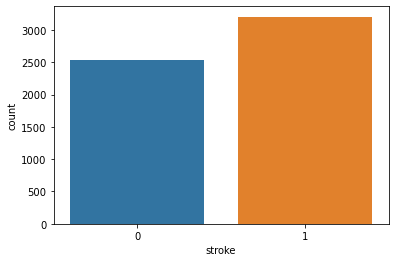

In [20]:
sns.countplot(x=y_train,data=data)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1068
           1       0.86      0.89      0.88      1391

    accuracy                           0.86      2459
   macro avg       0.86      0.85      0.85      2459
weighted avg       0.86      0.86      0.86      2459



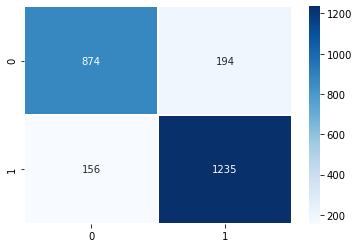

In [21]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression(solver="lbfgs",max_iter=1000)
logis.fit(x_train,y_train)
pred_logis = logis.predict(x_test)

print(classification_report(y_test,pred_logis))

confus = confusion_matrix(y_test, pred_logis)
sns.heatmap(confus, annot=True, cmap="Blues",linewidths=1,fmt="d")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1068
           1       0.85      0.89      0.87      1391

    accuracy                           0.85      2459
   macro avg       0.85      0.84      0.84      2459
weighted avg       0.85      0.85      0.85      2459



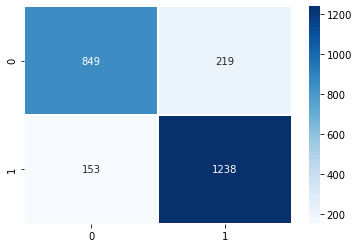

In [22]:

from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(x_train,y_train)
pred_bayes = bayes.predict(x_test)

print(classification_report(y_test,pred_bayes))


confus = confusion_matrix(y_test, pred_bayes)
sns.heatmap(confus, annot=True, cmap="Blues",linewidths=1,fmt="d")
plt.show()




              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1068
           1       0.96      1.00      0.98      1391

    accuracy                           0.98      2459
   macro avg       0.98      0.97      0.98      2459
weighted avg       0.98      0.98      0.98      2459



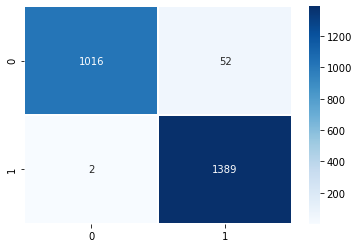

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print(classification_report(y_test,pred_knn))

confus = confusion_matrix(y_test, pred_knn)
sns.heatmap(confus, annot=True, cmap="Blues",linewidths=1,fmt="d")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1068
           1       0.95      0.97      0.96      1391

    accuracy                           0.96      2459
   macro avg       0.96      0.95      0.96      2459
weighted avg       0.96      0.96      0.96      2459



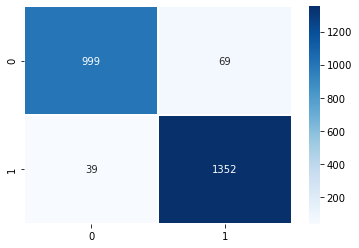

In [24]:
from sklearn.tree import DecisionTreeClassifier
dss = DecisionTreeClassifier()
dss.fit(x_train,y_train)
pred_dss = dss.predict(x_test)

print(classification_report(y_test,pred_dss))

confus = confusion_matrix(y_test, pred_dss)
sns.heatmap(confus, annot=True, cmap="Blues",linewidths=1,fmt="d")
plt.show()